In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt

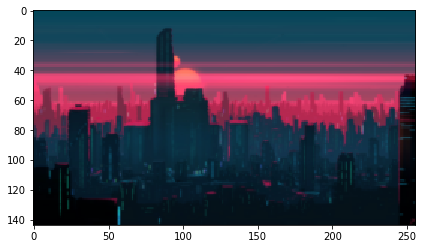

In [20]:
from skimage import io
from skimage.transform import rescale

# read our testing image in
tst_image = io.imread('./test_images/4.jpg')

# downsize the image
tst_image = rescale(tst_image, 0.1, anti_aliasing=True)
io.imshow(tst_image)

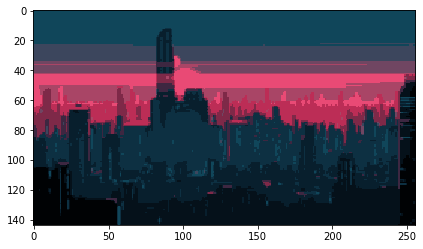

In [43]:
from sklearn.cluster import DBSCAN, KMeans

def results_to_df(x_dat, clusters):
    concatenated = []
    for pixel, cluster in zip(x_dat, clusters):
        pixel = list(pixel)
        pixel.append(cluster)
        concatenated.append(pixel)
    result_df = pd.DataFrame(concatenated)
    result_df.columns = ['r', 'g', 'b', 'cluster']
    return result_df

def cluster_image_colours(input_img, cluster_model=DBSCAN, *model_args, **model_kwargs):
    # get the number of pixels using the shape of the image
    x_len = input_img.shape[0]
    y_len = input_img.shape[1]
    num_pixels = x_len * y_len

    # reshape to a 2d image
    x_dat = input_img.reshape(num_pixels, 3)

    # train/predict with input model
    model = cluster_model(*model_args, **model_kwargs)
    clusters = model.fit_predict(x_dat)

    # create a df with cluster as a label
    labelled_df = results_to_df(x_dat, clusters)

    # sum up the instance colours for each cluster
    cluster_colours = {}
    instance_counts = {}
    for row in labelled_df.iterrows():
        row = row[1]
        cluster = int(row.loc['cluster'])
        cluster_colours.setdefault(cluster, [0.0, 0.0, 0.0])
        instance_counts.setdefault(cluster, 0)
        cluster_colours[cluster] += row.iloc[0:3].values
        instance_counts[cluster] += 1
    
    # average the colour
    for cluster in cluster_colours:
        summed_colour = cluster_colours[cluster]
        num_cluster_instances = instance_counts[cluster]
        cluster_colours[cluster] = [channel / num_cluster_instances for channel in summed_colour]

    # label each row with it's cluster's colour
    labelled_df['cluster_colour'] = labelled_df['cluster'].apply(lambda c: cluster_colours[c]) 

    # shaping back to the original image dimensions
    final_img = labelled_df.iloc[:, -1].values
    final_img = np.array([np.array(pixel) for pixel in final_img])
    final_img = final_img.reshape(x_len, y_len, 3)
    return final_img, cluster_colours

clustered_image, cluster_cols = cluster_image_colours(tst_image, cluster_model=KMeans, n_clusters=12)
io.imshow(clustered_image)

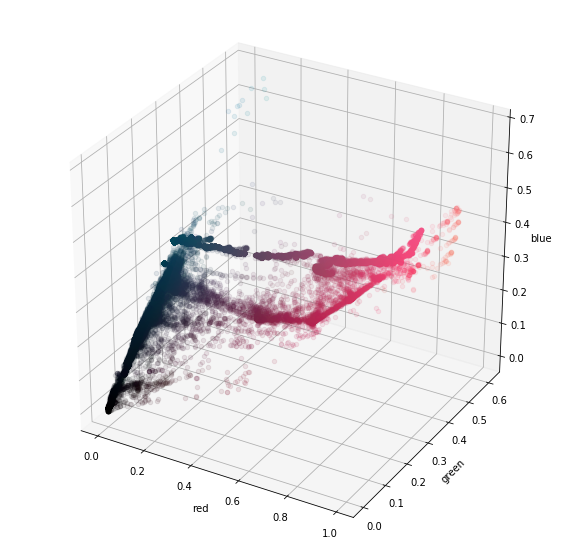

In [28]:
flatten_img = lambda img: img.reshape(img.shape[0] * img.shape[1], 3)

def plot_image_colours(image_or_list):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # lambda for plotting
    plot_pixel = lambda _pixel, _ax: _ax.scatter(_pixel[0], _pixel[1], _pixel[2], color=tuple(_pixel), alpha=0.1)

    # so we can plot multiple images or just a single image
    if type(image_or_list) == list:
        for image in image_or_list:
            for pixel in flatten_img(image):
                plot_pixel(pixel, ax)
    else:
        for pixel in flatten_img(image_or_list):
            plot_pixel(pixel, ax)
    
    # label our axes
    ax.set_xlabel('red')
    ax.set_ylabel('green')
    ax.set_zlabel('blue')
    plt.show()

plot_image_colours(tst_image)

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


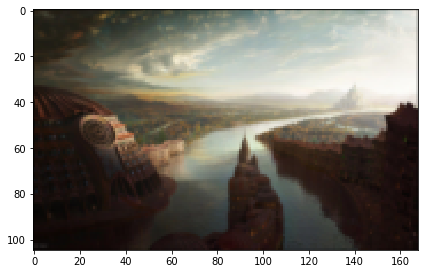

In [35]:
# read our testing image in
tst_image_3 = io.imread('./test_images/3.jpg')

# downsize the image
tst_image_3 = rescale(tst_image_3, 0.1, anti_aliasing=True)
io.imshow(tst_image_3)

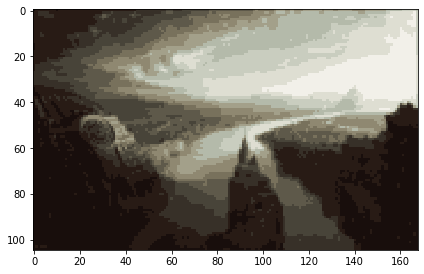

In [44]:
# cluster the image
clustered_3, cluster3_cols = cluster_image_colours(tst_image_3, cluster_model=KMeans, n_clusters=12)
io.imshow(clustered_3)

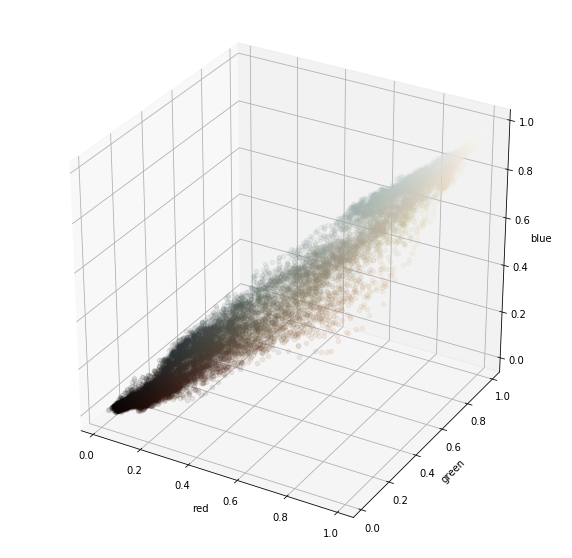

In [36]:
plot_image_colours(tst_image_3)

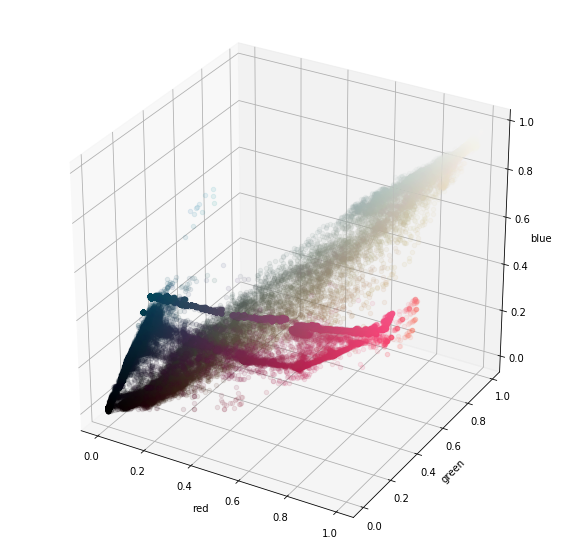

In [37]:
# plot the colours from both images together
plot_image_colours([tst_image, tst_image_3])

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


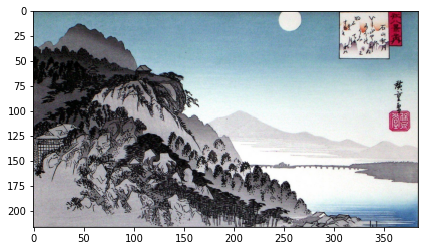

In [46]:
# read our testing image in
tst_image_2 = io.imread('./test_images/2.jpg')

# downsize the image
tst_image_2 = rescale(tst_image_2, 0.2, anti_aliasing=True)
io.imshow(tst_image_2)

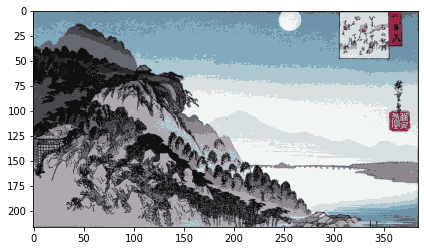

In [47]:
# cluster the image
clustered_2, cluster2_cols = cluster_image_colours(tst_image_2, cluster_model=KMeans, n_clusters=12)
io.imshow(clustered_2)

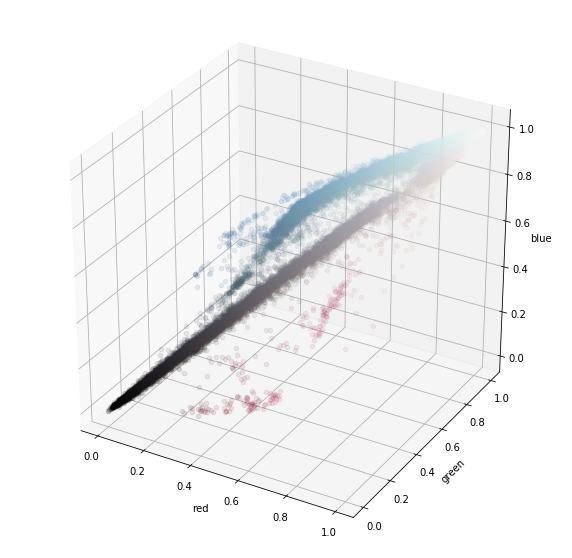

In [40]:
plot_image_colours(tst_image_2)

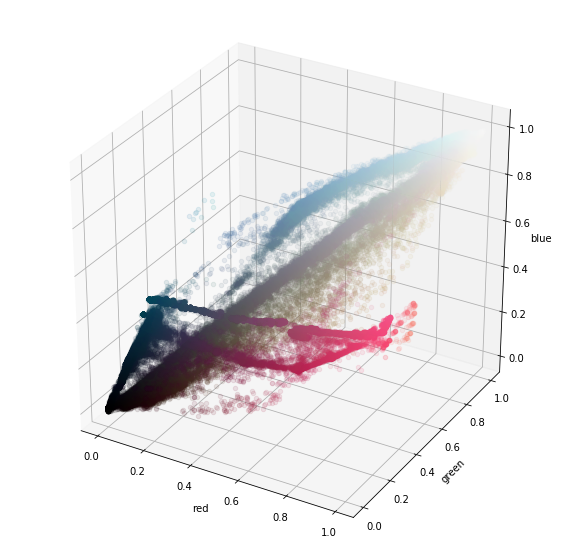

In [41]:
# plot the colours from both images together
plot_image_colours([tst_image, tst_image_2, tst_image_3])